## Programas para todos los apartados


Como para muchos apartados se pide que se estudie lo mismo, así agrupo los programas en uno y menos lío.

#### Descripción del programa:

Se usa el programa en c de cada apartado. En todos los apartados es básicamente el mismo, solo que cambio las cosas que dice cada apartado.

El notebook es para TODOS el mismo, ya que coge los datos de las rutas especificadas o de la misma carpeta. Esto facilita el uso del programa a la hora de hacer muchos histogramas, videos o demás ploteos.

Dicho esto, comencemos con el programa.




### 1º Programa: animar N partículas para una caja de lado L

Este programa sirva para hacer la animación de todas las partículas dentro de la caja. Para ello cojemos los datos de posiciones.txt y lo ploteamos. El programa pondrá un punto en cada posición y con un paso temporal lo suficientemente pequeño lo veremos continuo.

Este programa es visual, podemos observar la atracción pero sobretodo la repulsión de las partículas entre ellas.

Para ello defino una función que lea el archivo en cuestión (posiciones.txt) y otra función que las anime.

Con copilot (a parte de ayudarme con las autocompletaciones y comentarios) he implementado una opción para hacer video o gif, según el tiempo que tenga para hacer el ploteo de la animación.

NECESITA:

- posiciones.txt
- N
- L

Suelta:

- simulacion_N_L.mp4 o un gif.


C:\Users\diego\AppData\Local\Temp\ipykernel_11808\2347788365.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion_N20_L10.0.mp4'.


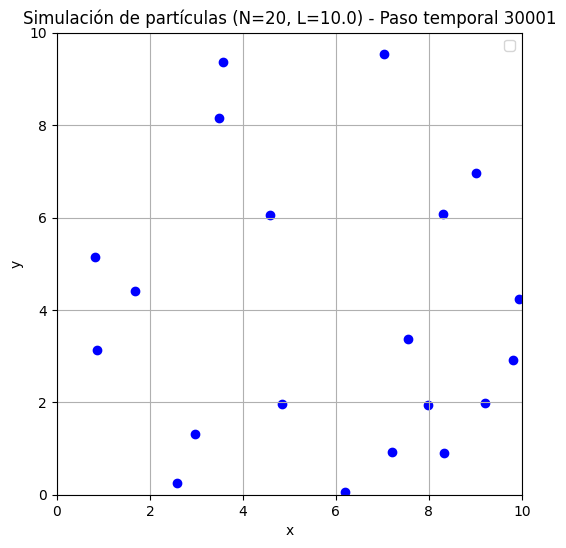

In [16]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=10.0
N=20



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  

        for linea in file:
            linea = linea.strip()
            if linea:  
                datos = linea.split(",")  
                r1x, r1y = float(datos[0]), float(datos[1])  
                paso_actual.append((r1x, r1y))
            else:  
                if paso_actual:  
                    posiciones.append(paso_actual)
                    paso_actual = []  

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Simulación de partículas (N={N}, L={L})")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)


    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Simulación de partículas (N={N}, L={L}) - Paso temporal {frame + 1}")


    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.gif", writer=gif_writer)
        print(f"GIF guardado como 'simulacion_N{N}_L{L}.gif'.")

    # Guardar como video
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.mp4", writer=video_writer)
        print(f"Video guardado como 'simulacion_N{N}_L{L}.mp4'.")

    plt.show()

# Uso el programa
if __name__ == "__main__":
    archivo = "SALIDA.txt"  
    posiciones = leer_posiciones(archivo)


    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

### 2º Programa: Ploteo de energía


#### 2.1 Ploteo fijo de la energía

Este programa coge los datos de energia.txt y plotea 3 curvas, la energía cinética, potencial y total.
Toma solo una imagen por lo que es increblemente rápido.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_N_L.png

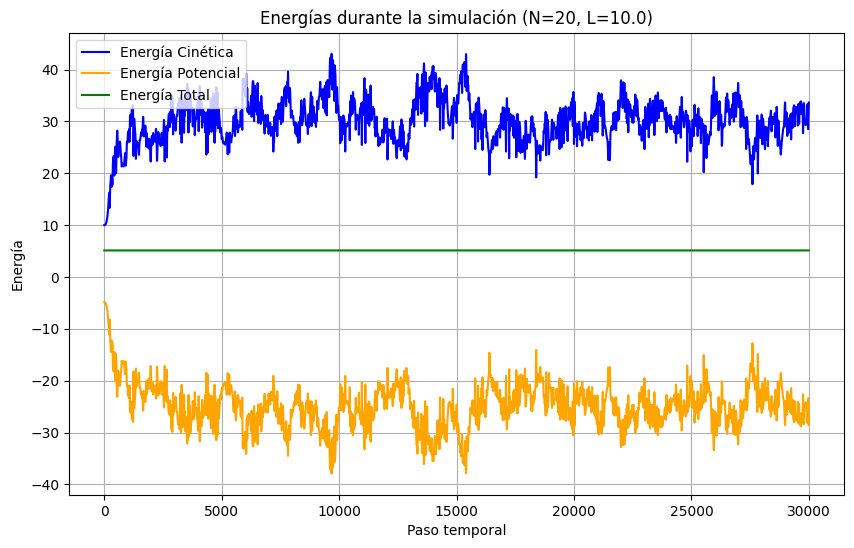

In [11]:
# PLOT DE ENERGIA


#PON LAS DIMENSIONES

L=10.0
N=20

import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title(f"Energías durante la simulación (N={N}, L={L})")  # Título con N y L
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Energia_N{N}_L{L}.png")  # Nombre del archivo con N y L
    plt.show()



##############   LO USAMOS       ####################

if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

#### 2.2 Animación de energía.

Este programa hace una animación para ver cómo evoluciona la energía poco a poco y más visual.

Tarda muchísimo y solo es recomendable usarlo en casos cortos.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_animacion.mp4


In [ ]:
###SI QUIERES ANIMACIÓN DE ENERGÍA###

#PON LAS DIMENSIONES

L=10.0
N=20


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para crear la animación
def crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=100, guardar_video=True):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Configuración de los subplots
    axs[0].set_title("Energía Cinética")
    axs[0].set_xlabel("Paso temporal")
    axs[0].set_ylabel("Energía Cinética")
    axs[0].grid(True)

    axs[1].set_title("Energía Potencial")
    axs[1].set_xlabel("Paso temporal")
    axs[1].set_ylabel("Energía Potencial")
    axs[1].grid(True)

    axs[2].set_title("Energía Total")
    axs[2].set_xlabel("Paso temporal")
    axs[2].set_ylabel("Energía Total")
    axs[2].grid(True)

    # Líneas para los gráficos
    line1, = axs[0].plot([], [], label="Energía Cinética", color="blue")
    line2, = axs[1].plot([], [], label="Energía Potencial", color="orange")
    line3, = axs[2].plot([], [], label="Energía Total", color="green")

    # Función para inicializar los gráficos
    def init():
        for ax in axs:
            ax.set_xlim(0, len(energia_cinetica))
            ax.set_ylim(min(min(energia_cinetica), min(energia_potencial), min(energia_total)) * 0.9,
                        max(max(energia_cinetica), max(energia_potencial), max(energia_total)) * 1.1)
        return line1, line2, line3

    # Función para actualizar los gráficos en cada frame
    def actualizar(frame):
        x = list(range(frame + 1))
        line1.set_data(x, energia_cinetica[:frame + 1])
        line2.set_data(x, energia_potencial[:frame + 1])
        line3.set_data(x, energia_total[:frame + 1])
        return line1, line2, line3

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(energia_cinetica), init_func=init, interval=intervalo, blit=True)

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = FFMpegWriter(fps=1000 // intervalo)
        anim.save("energia_animacion.mp4", writer=video_writer)
        print("Video guardado como 'energia_animacion.mp4'.")

    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Crear la animación
    crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=10, guardar_video=True)

### 3º Programa: Histogramas.

A continuación se presentan varios programas, todos ellos hacen prácticamente lo mismo, grafican un histograma de velocidades a una temperatura T fija. Las curvas se reescalan para que los máximos coincidan.

#### 3.1 Histograma del módulo v.

Este programa aproxima el histograma a una curva de Maxwell definida en el mismo programa: 
$$
\begin{equation}
P(V)=\left(\frac{m}{k_B T} \right)ve^{\frac{-mv^2}{2k_BT}}
\end{equation}

$$

Necesita:
- histograma.txt
- T

Suelta:
- Histograma_V_T(valor).png

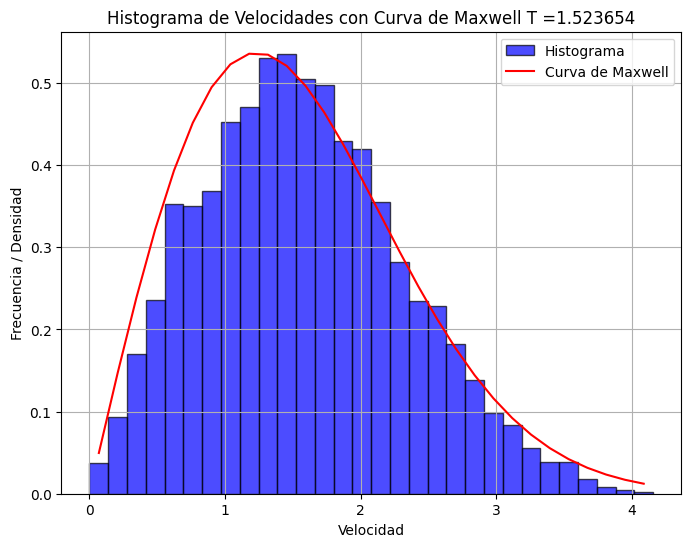

In [12]:
#HISTOGRAMA DE VELOCIDAD V: PON LA TEMPERATURA



T=1.523654

import matplotlib.pyplot as plt
import numpy as np



# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columna = linea.strip().split()[0]  # Leer solo la primera columna
            datos.append(float(columna))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer una curva de Maxwell
def graficar_histograma_con_curva(datos_histograma, curva_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva de Maxwell si se proporciona una función
    if curva_funcion:
        curva = curva_funcion(bins_centro)
        # Escalar la curva para que coincida con el histograma
        escala = max(conteo) / max(curva)
        plt.plot(bins_centro, curva * escala, color='red', label='Curva de Maxwell')

    # Personalización del gráfico
    plt.xlabel('Velocidad')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma de Velocidades con Curva de Maxwell T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_V_T{T}.png")
    plt.show()

####### LO USAMOS ######
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos
    datos_histograma = leer_datos_histograma(archivo_histograma)

    # Definir la función para la curva de distribución de Maxwell
    def curva_maxwell(v):
        m = 1.0  
        k_B = 1.0 
        
        return  1/T* v * np.exp(-m * v**2 / (2 * k_B * T))

    # Graficar el histograma con la curva de Maxwell
    graficar_histograma_con_curva(datos_histograma, curva_funcion=curva_maxwell)

#### 3.2 Histograma velocidad Vx.

Ahora en lugar de cogernos el módulo de la velocidad, cogeremos la componente x que cambia que la curva ahora es una gaussiana.
$$
\begin{equation}
P(v_x)=\sqrt{\frac{m}{2\pi k_B T}}ve^{\frac{-mv^2}{2k_BT}}
\end{equation}
$$
Suelta:
- Histograma_Vx_T(valor).png

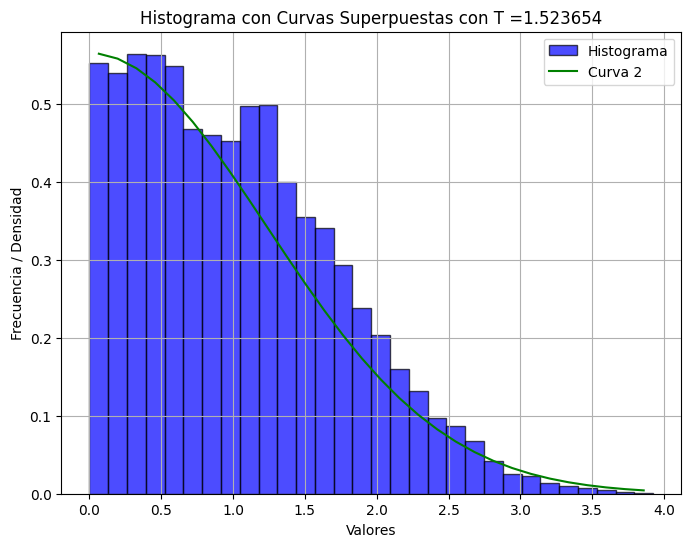

In [13]:
# PARA EL EJE X DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva2_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva si se proporciona una función
    if curva2_funcion:
        curva2 = curva2_funcion(bins_centro)
        escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva2 * escala2, color='green', label='Curva 2')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma con Curvas Superpuestas con T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_Vx_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva2(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva2_funcion=curva2)

#### 3.3 Histograma velocidad Vy

Lo mismo de antes pero para la velocidad en el eje Y en vez de la X.

Suelta:
- Histograma_Vy_T(valor).png

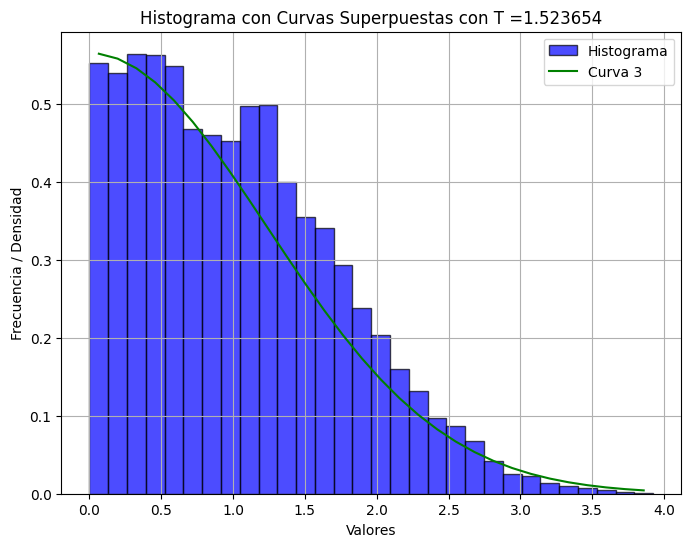

In [14]:
# PARA EL EJE Y DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva3_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la segunda curva si se proporciona una función
    if curva3_funcion:
        curva3 = curva3_funcion(bins_centro)
        escala3 = max(conteo) / max(curva3)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva3 * escala3, color='green', label='Curva 3')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma con Curvas Superpuestas con T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_Vy_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva3(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva3_funcion=curva3)

#### 3.4 Histograma de todas las velocidades

Se agrupan ahora todas las velocidades: v, vx, vy; y además se ponen las curvas a las que se agrupan.

Necesita:
- T
- Histograma.txt

Suelta:
- HistogramaTotal_T.png

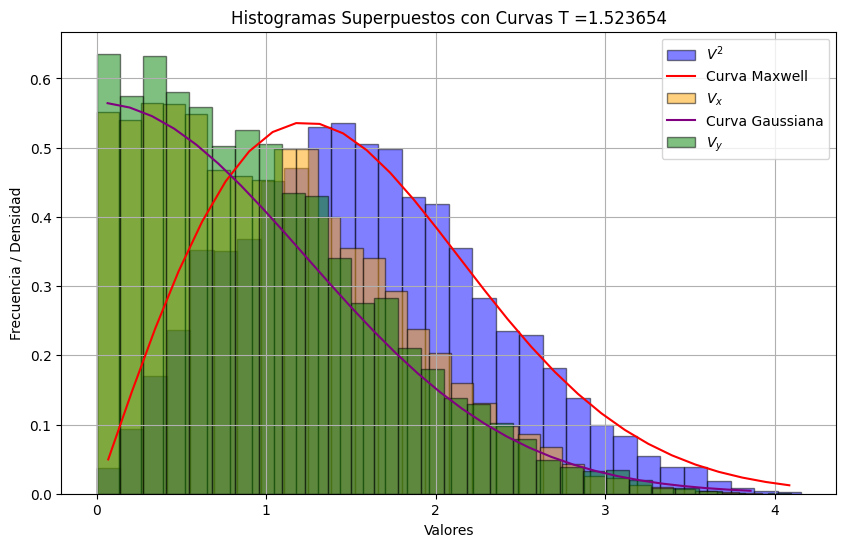

In [4]:
## EL HISTOGRAMA DE LAS TRES VELOCIDADES

#DEFINE AQUI LA TEMPERATURA
T=1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    columnas = []
    with open(filename, 'r') as file:
        for linea in file:
            valores = list(map(float, linea.strip().split()))  # Convertir cada valor en flotante
            if not columnas:
                columnas = [[] for _ in range(len(valores))]  # Inicializar listas para cada columna
            for i, valor in enumerate(valores):
                columnas[i].append(valor)
    return columnas

# Función para graficar los histogramas superpuestos con curvas
def graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=None, curva2_funcion=None):
    colores = ['blue', 'orange', 'green']  # Colores para los histogramas
    etiquetas = [r'$V^2$', r'$V_x$', r'$V_y$']  # Etiquetas para las leyendas

    plt.figure(figsize=(10, 6))
    for i, datos in enumerate(datos_columnas):
        conteo, bins, _ = plt.hist(datos, bins=30, alpha=0.5, color=colores[i], label=etiquetas[i], edgecolor='black', density=True)
        bins_centro = (bins[:-1] + bins[1:]) / 2  # Calcular el centro de cada barra del histograma

        # Para la primera columna, graficar la curva 1
        if curva1_funcion and i == 0:  
            curva1 = curva1_funcion(bins_centro)
            escala1 = max(conteo) / max(curva1)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva1 * escala1, color='red', label='Curva Maxwell')

        # Para la segunda columna, graficar la curva 2
        if curva2_funcion and i == 1:  
            curva2 = curva2_funcion(bins_centro)
            escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva2 * escala2, color='purple', label='Curva Gaussiana')

    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histogramas Superpuestos con Curvas T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"HistogramaTotal_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "histograma.txt"  # Nombre del archivo
    datos_columnas = leer_datos_histograma(archivo)

    # Definir las funciones para las curvas
    def curva1(x):
        m = 1.0  # Masa
        k_B = 1.0  # Constante de Boltzmann
        return (1 / T) * x * np.exp(-m * x**2 / (2 * k_B * T))
        

    def curva2(x):
        M = 1.0  # Masa
        KB = 1.0  # Constante de Boltzmann
        return np.sqrt(M / (2 * np.pi * KB * T)) * np.exp(-M * x**2 / (2 * KB * T))

    # Graficar los histogramas con las curvas
    graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=curva1, curva2_funcion=curva2)

#### Análisis de los histogramas:

Como podemos ver, se asemejas muchísimo a las curvas planteadas por el guión y podemos concluir que sí existe una concordancia tanto para vx, vy como el módulo.